In [1]:
import pandas as pd
import sidetable
import numpy as np
import openpyxl
import dataframe_image as dfi
from pathlib import Path
import matplotlib.pyplot as plt
import textwrap
import csv
import os
import sys
import getopt
import time
import datetime
import random
import calendar
from datetime import timedelta
from calendar import monthrange
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
#####################
# SET CURRENT MONTH
#####################
currentmonth = 2

In [3]:
###############
# SYSTEM FONT
###############
rcParams["font.family"] = "xkcd Script"
rcParams.update({"font.size": 40})

####################
# SET COLOR SCHEME
####################
clrs = ["#1B5EC9", "#FF5501", "#FFC5DE", "#31D2A1", "#FFC701", "#DCCFFF"]
d = {'#1B5EC9': "#FFFFFF", 
     '#FF5501': "#FFFFFF", 
     "#FFC5DE": "#000000", 
     "#31D2A1": "#FFFFFF", 
     "#FFC701": "#000000", 
     "#DCCFFF": "#000000",
     "white": "black",
     "tab:blue": "white",
     "tab:orange": "white",
     "tab:gray": "black",
     "tab:green": "white",
     "tab:brown": "white",
     "tab:pink": "white",
     "tab:purple": "white",
     "whitesmoke": "black"}

#########
# DATES
#########
YYYYMMDD = "2023-" + "{:02d}".format(currentmonth) + "-01"
YYYYMM = "2023-" + "{:02d}".format(currentmonth)
days = monthrange(2023, currentmonth)[1]
month = calendar.month_abbr[currentmonth]
month_label = "2023 " + month.upper() + " RECAP"

In [4]:
#############
# FUNCTIONS
#############
def custom_label(names):
    labels = list(names)
    global wrapped_labels
    wrapped_labels = []
    for text in labels:
        wrapped_labels.append(textwrap.fill(text, width=10, break_long_words=False))
        
    return(wrapped_labels)
        
def custom_wedges():
    tempList = random.sample(clrs, 6)
    global colors
    colors = []
    for i in range(len(wrapped_labels)):
        if i <= 5:
            colors.append(tempList[i])
        elif i >= 6:
            colors.append(tempList[i-6])
    
    return(colors)
            
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

def custom_money_piechart():
    pctscolors = [d[k] for k in colors]
    fig, ax = plt.subplots(figsize=(15, 15), dpi=100)
    patches, texts, pcts = ax.pie(tab["percent"], labels=wrapped_labels, colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct, pctdistance=0.825, startangle=random.randint(0, 360))
    for pct, color in zip(pcts, pctscolors):
        pct.set_color(color)
        
    center_circle = plt.Circle((0, 0), 0.65, color="#E2EDFF")
    fig.gca().add_artist(center_circle)
    plt.text(0, 0, "${}".format(tab_total), ha="center", va="center", fontsize=100)
    plt.setp(pcts, fontsize=32)
    fig.set_facecolor("#E2EDFF")
    plt.subplots_adjust(top=0.85)
    plt.text(0.02, 0.02, "@HANDMADEPHD", fontsize=42, transform=plt.gcf().transFigure)
    plt.text(0.71, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

def custom_project_piechart():
    pctscolors = [d[k] for k in colors]
    fig, ax = plt.subplots(figsize=(15, 15), dpi=100)
    patches, texts, pcts = ax.pie(tab["percent"], labels=wrapped_labels, colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct, pctdistance=0.825, startangle=random.randint(0, 360))
    for pct, color in zip(pcts, pctscolors):
        pct.set_color(color)
        
    center_circle = plt.Circle((0, 0), 0.65, color="#E2EDFF")
    fig.gca().add_artist(center_circle)
    plt.text(0, 0, "{}".format(tab_total), ha="center", va="center", fontsize=150)
    plt.setp(pcts, fontsize=32)
    fig.set_facecolor("#E2EDFF")
    plt.subplots_adjust(top=0.85)
    plt.text(0.02, 0.02, "@HANDMADEPHD", fontsize=42, transform=plt.gcf().transFigure)
    plt.text(0.71, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

def custom_time_piechart():
    pctscolors = [d[k] for k in colors]
    fig, ax = plt.subplots(figsize=(15, 15), dpi=100)
    patches, texts, pcts = ax.pie(tab["percent"], labels=wrapped_labels, colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct, pctdistance=0.825, startangle=random.randint(0, 360))
    for pct, color in zip(pcts, pctscolors):
        pct.set_color(color)
        
    center_circle = plt.Circle((0, 0), 0.65, color="#E2EDFF")
    fig.gca().add_artist(center_circle)
    plt.text(0, 0, "{}".format(tab_total), ha="center", va="center", fontsize=150)
    plt.setp(pcts, fontsize=32)
    fig.set_facecolor("#E2EDFF")
    plt.subplots_adjust(top=0.85)
    plt.text(0.02, 0.02, "@HANDMADEPHD", fontsize=42, transform=plt.gcf().transFigure)
    plt.text(0.71, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

def secondsToTime(seconds):
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return "%d:%02d" % (hours, minutes)

In [5]:
##########################
# LOAD SPENT DATASHEET
##########################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="SPENT", parse_dates=["DATE"])
df = df[df["DATE"] .dt.strftime("%Y-%m") == YYYYMM]

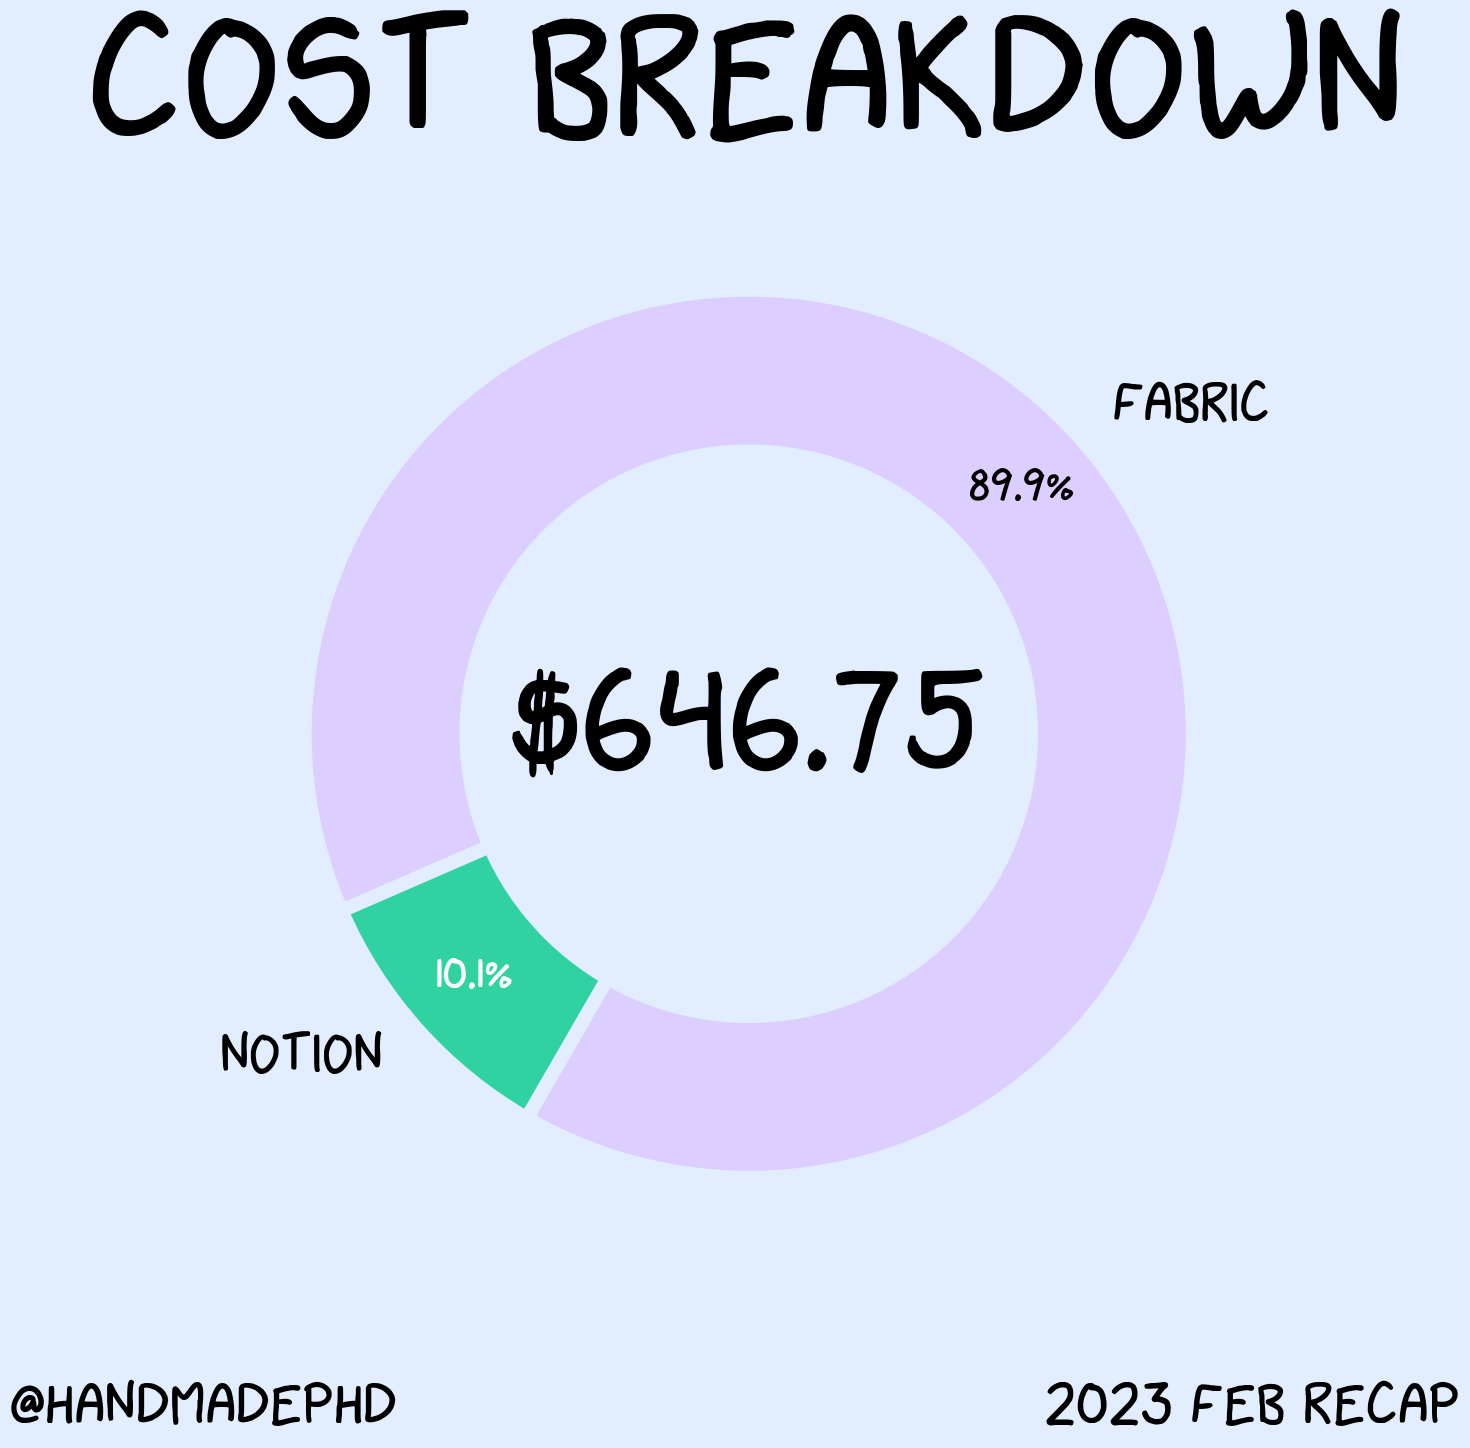

In [6]:
########
# COST
########
var = "CATEGORY"
tab = df.stb.freq([var], value="COST")
tab_total = round(sum(tab["COST"]), 2)

custom_label(tab[var])
custom_wedges()
custom_money_piechart()

# SAVE FIGURE
plt.title("COST BREAKDOWN", fontsize=125, loc="center")
plt.savefig("cost-breakdown.png", dpi=150)
plt.show()

In [7]:
##########################
# LOAD PROJECT DATASHEET
##########################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="PROJECTS")
df["MADE FOR"].replace(to_replace=["NAOMI"], value="ME", inplace=True)
df["MADE FOR"].replace(to_replace=["RYAN"], value="NOT ME", inplace=True)
df["ARRIVED"] = df["ARRIVED"].astype("datetime64[ns]")
df["STARTED"] = df["STARTED"].astype("datetime64[ns]")
df["PROJECT COMPLETED"] = df["PROJECT COMPLETED"].astype("datetime64[ns]")
df = df[df["PROJECT COMPLETED"] .dt.strftime("%Y-%m") == YYYYMM]

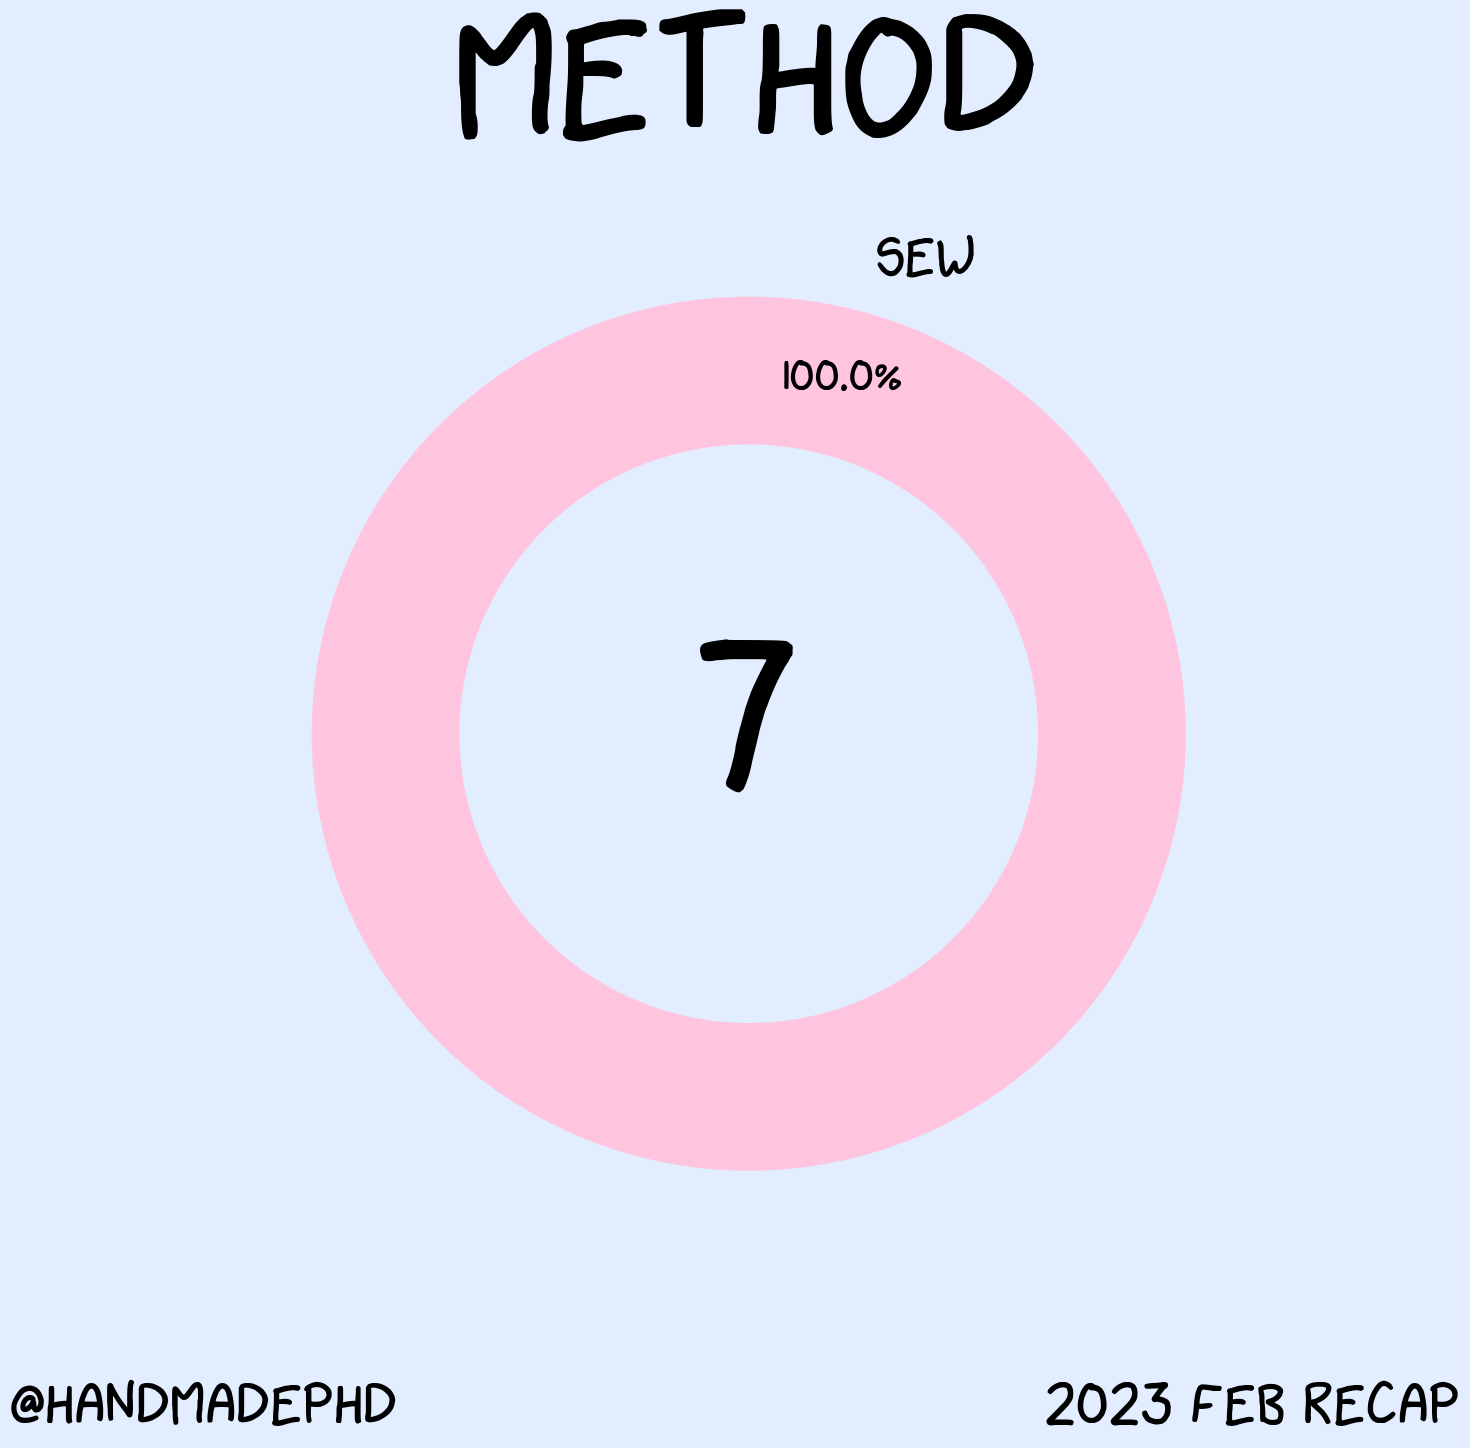

In [8]:
##########
# METHOD
##########
var = "METHOD"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("METHOD", fontsize=125, loc="center")
plt.savefig("method.png", dpi=150)
plt.show()

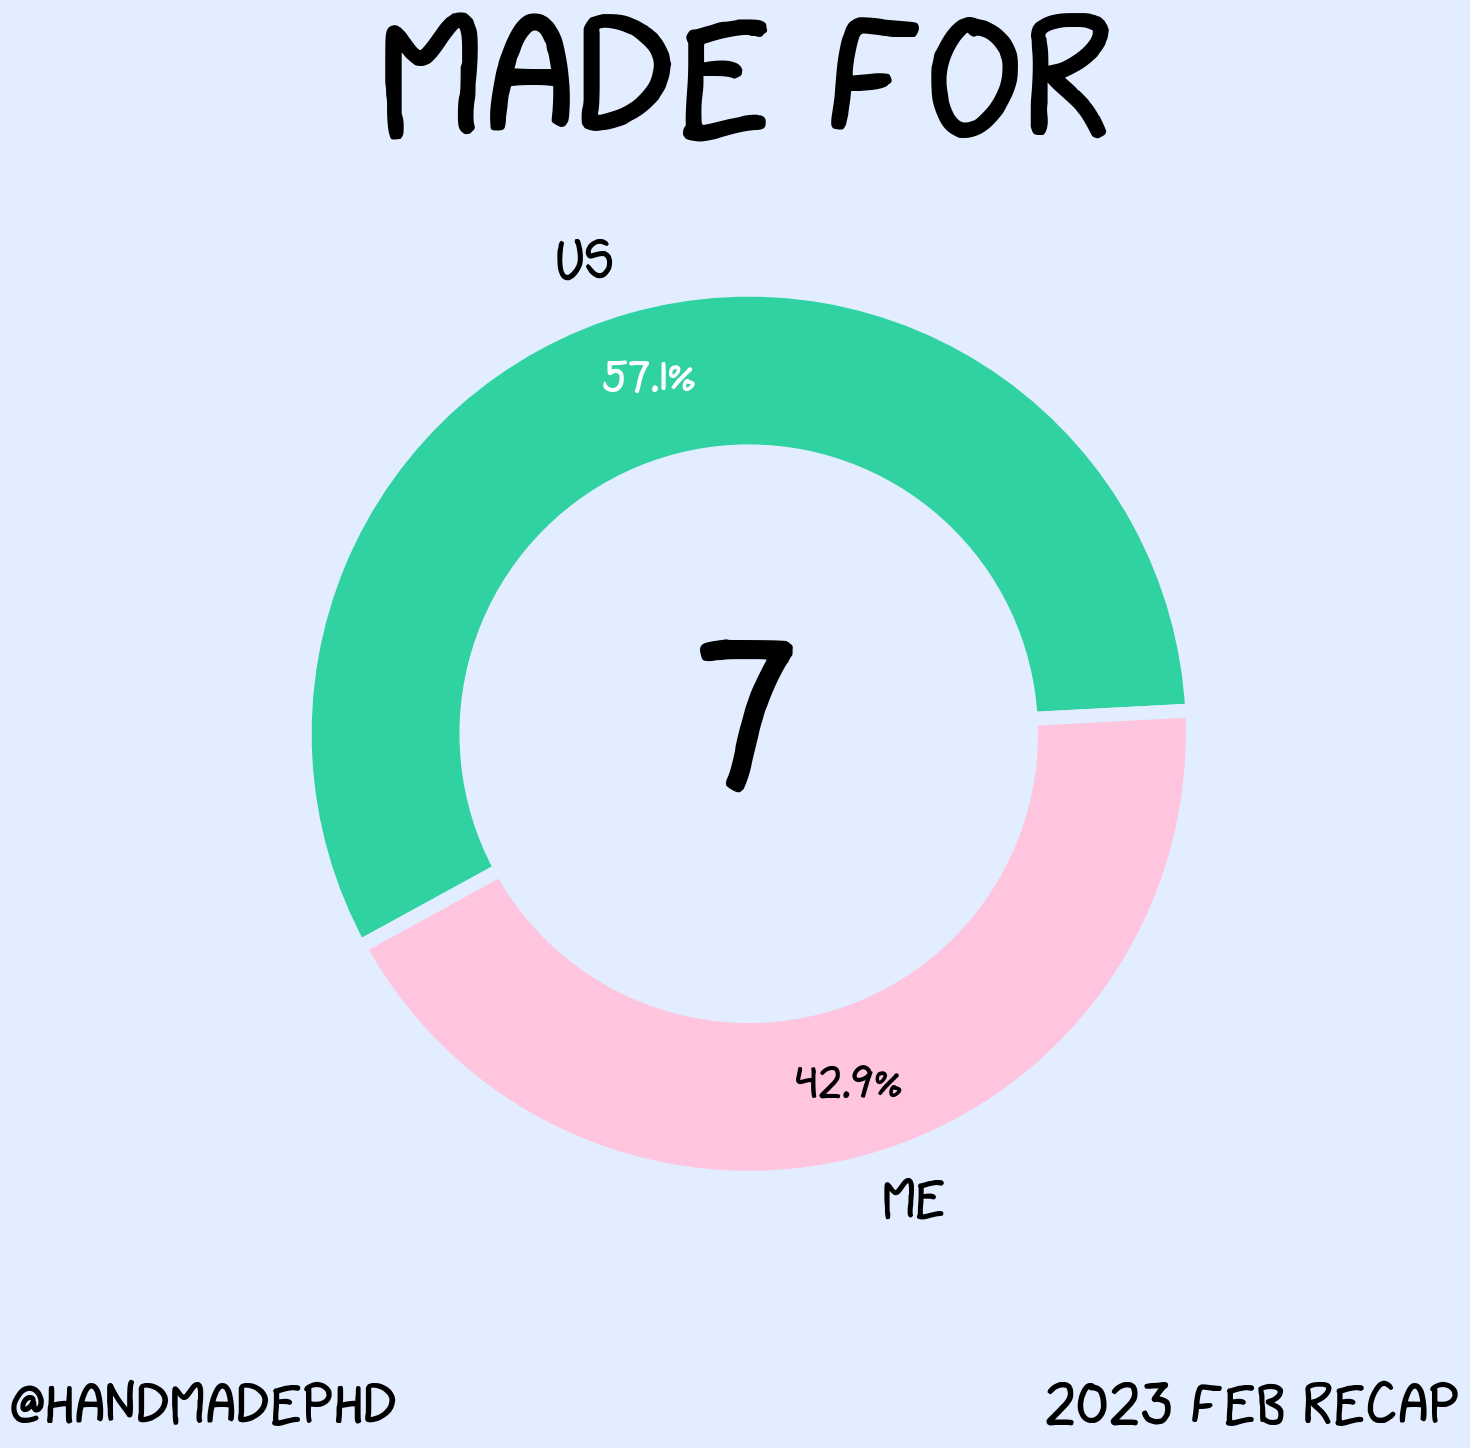

In [9]:
############
# MADE FOR
############
var="MADE FOR"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("MADE FOR", fontsize=125, loc="center")
plt.savefig("made-for.png", dpi=150)
plt.show()

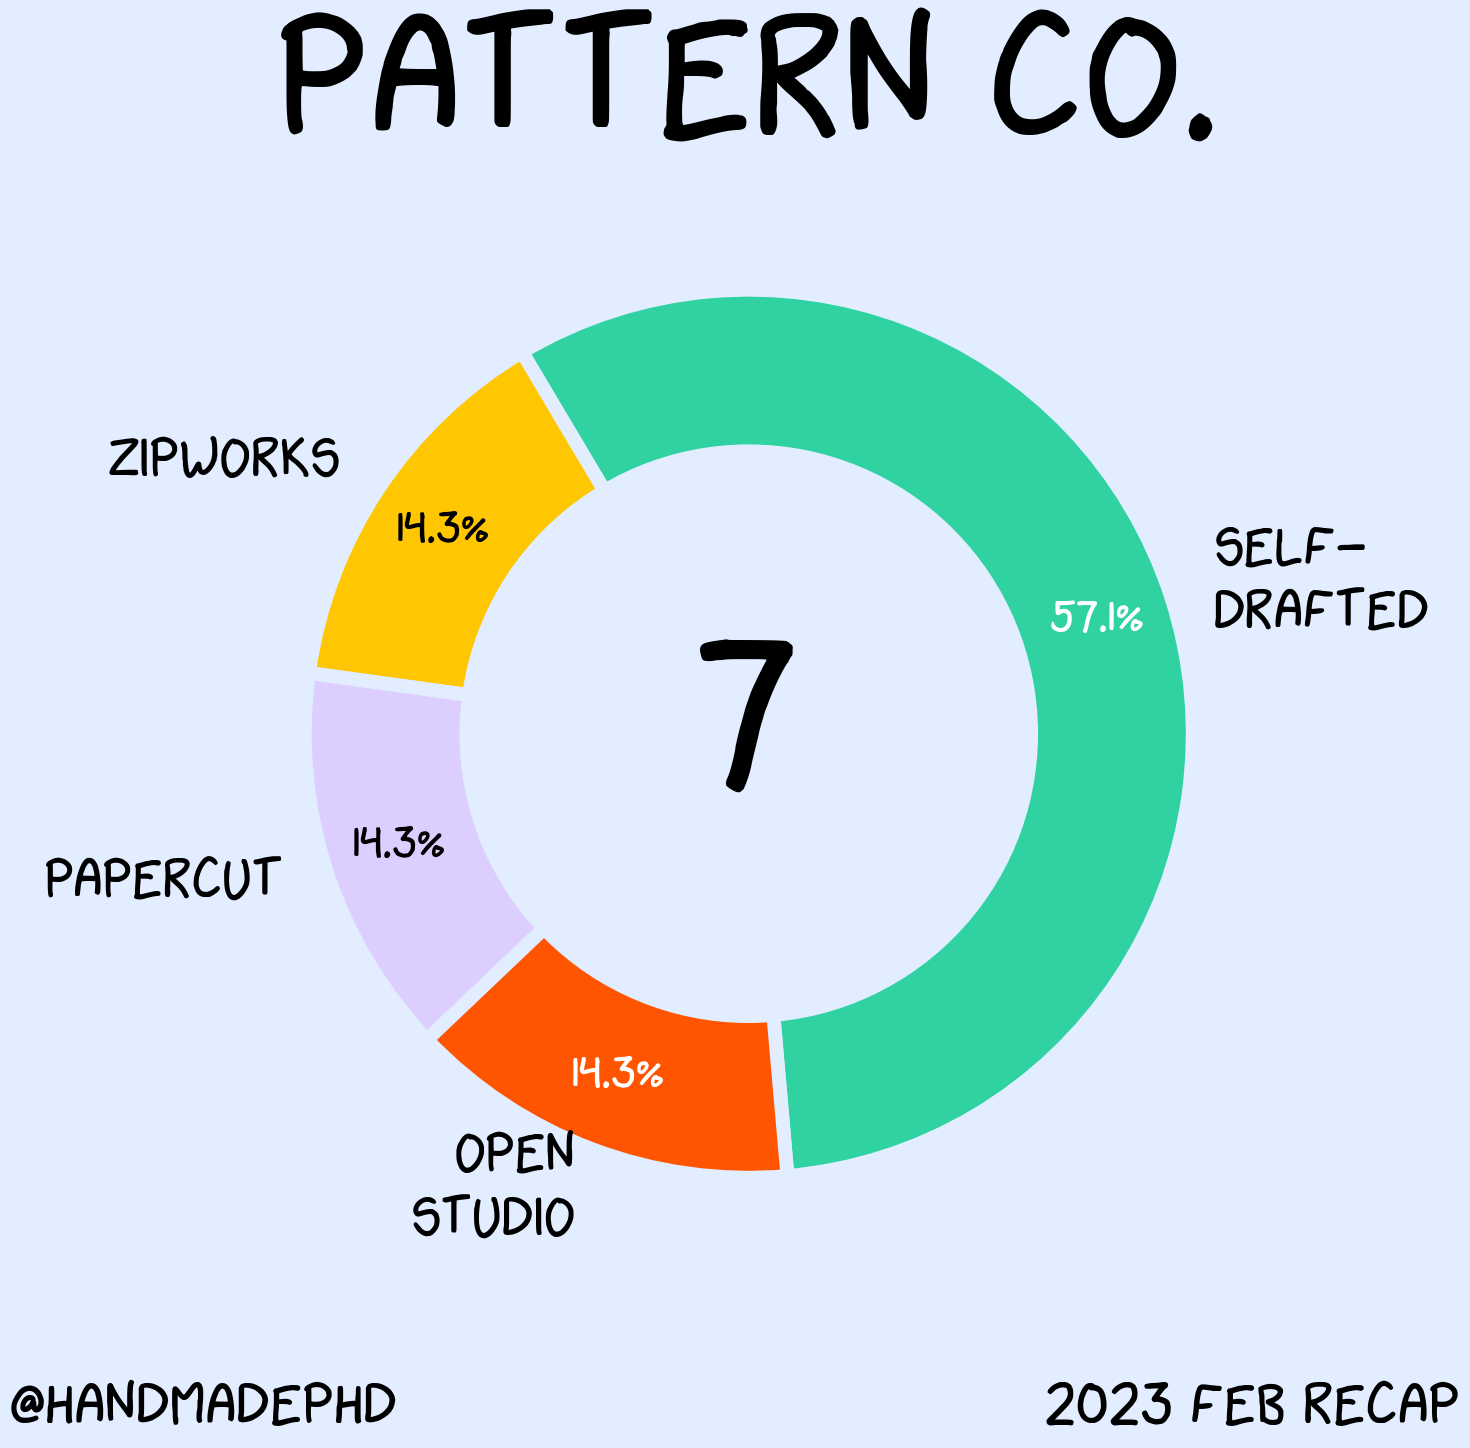

In [10]:
#####################
# PATTERN COMPANIES
#####################
var="PATTERN COMPANY"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("PATTERN CO.", fontsize=125, loc="center")
plt.savefig("pattern-companies.png", dpi=150)
plt.show()

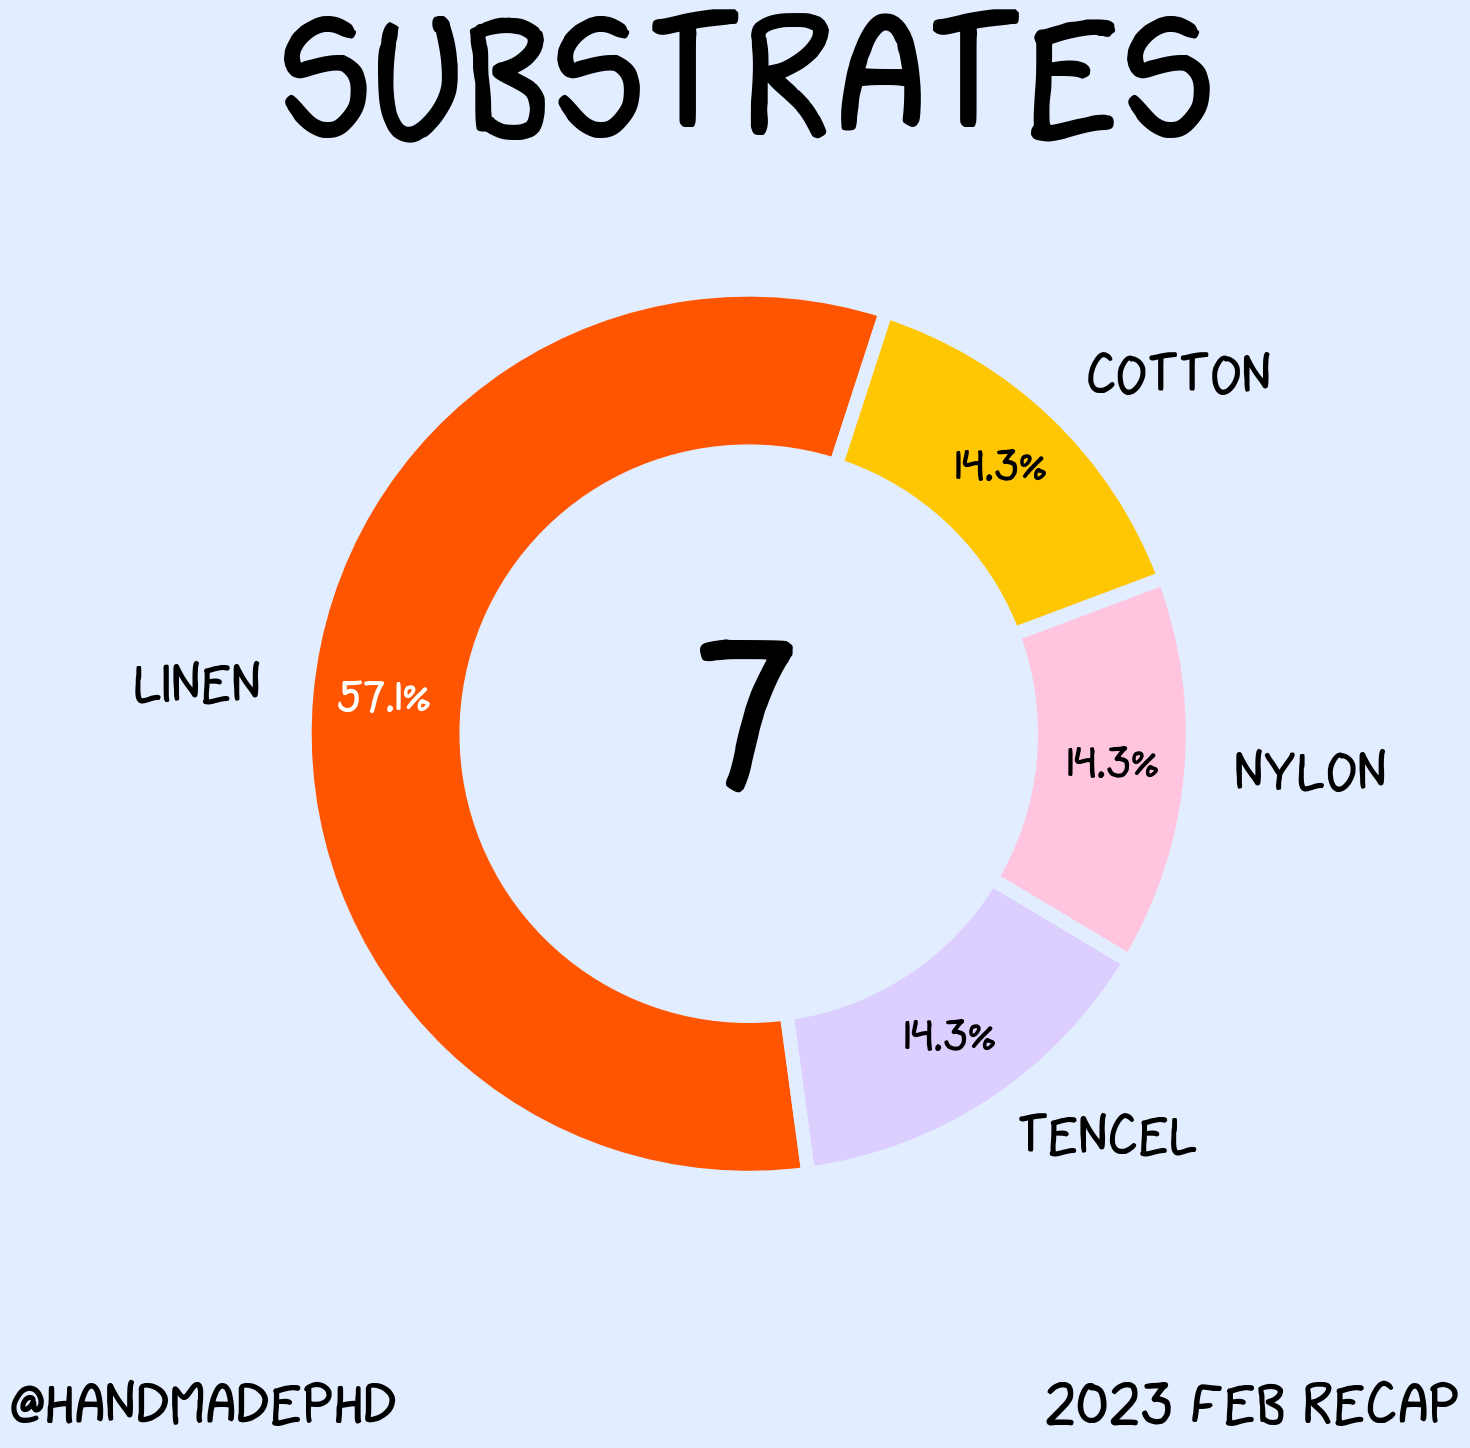

In [11]:
##############
# SUBSTRATES
##############
var="SUBSTRATE"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("SUBSTRATES", fontsize=125, loc="center")
plt.savefig("substrates.png", dpi=150)
plt.show()

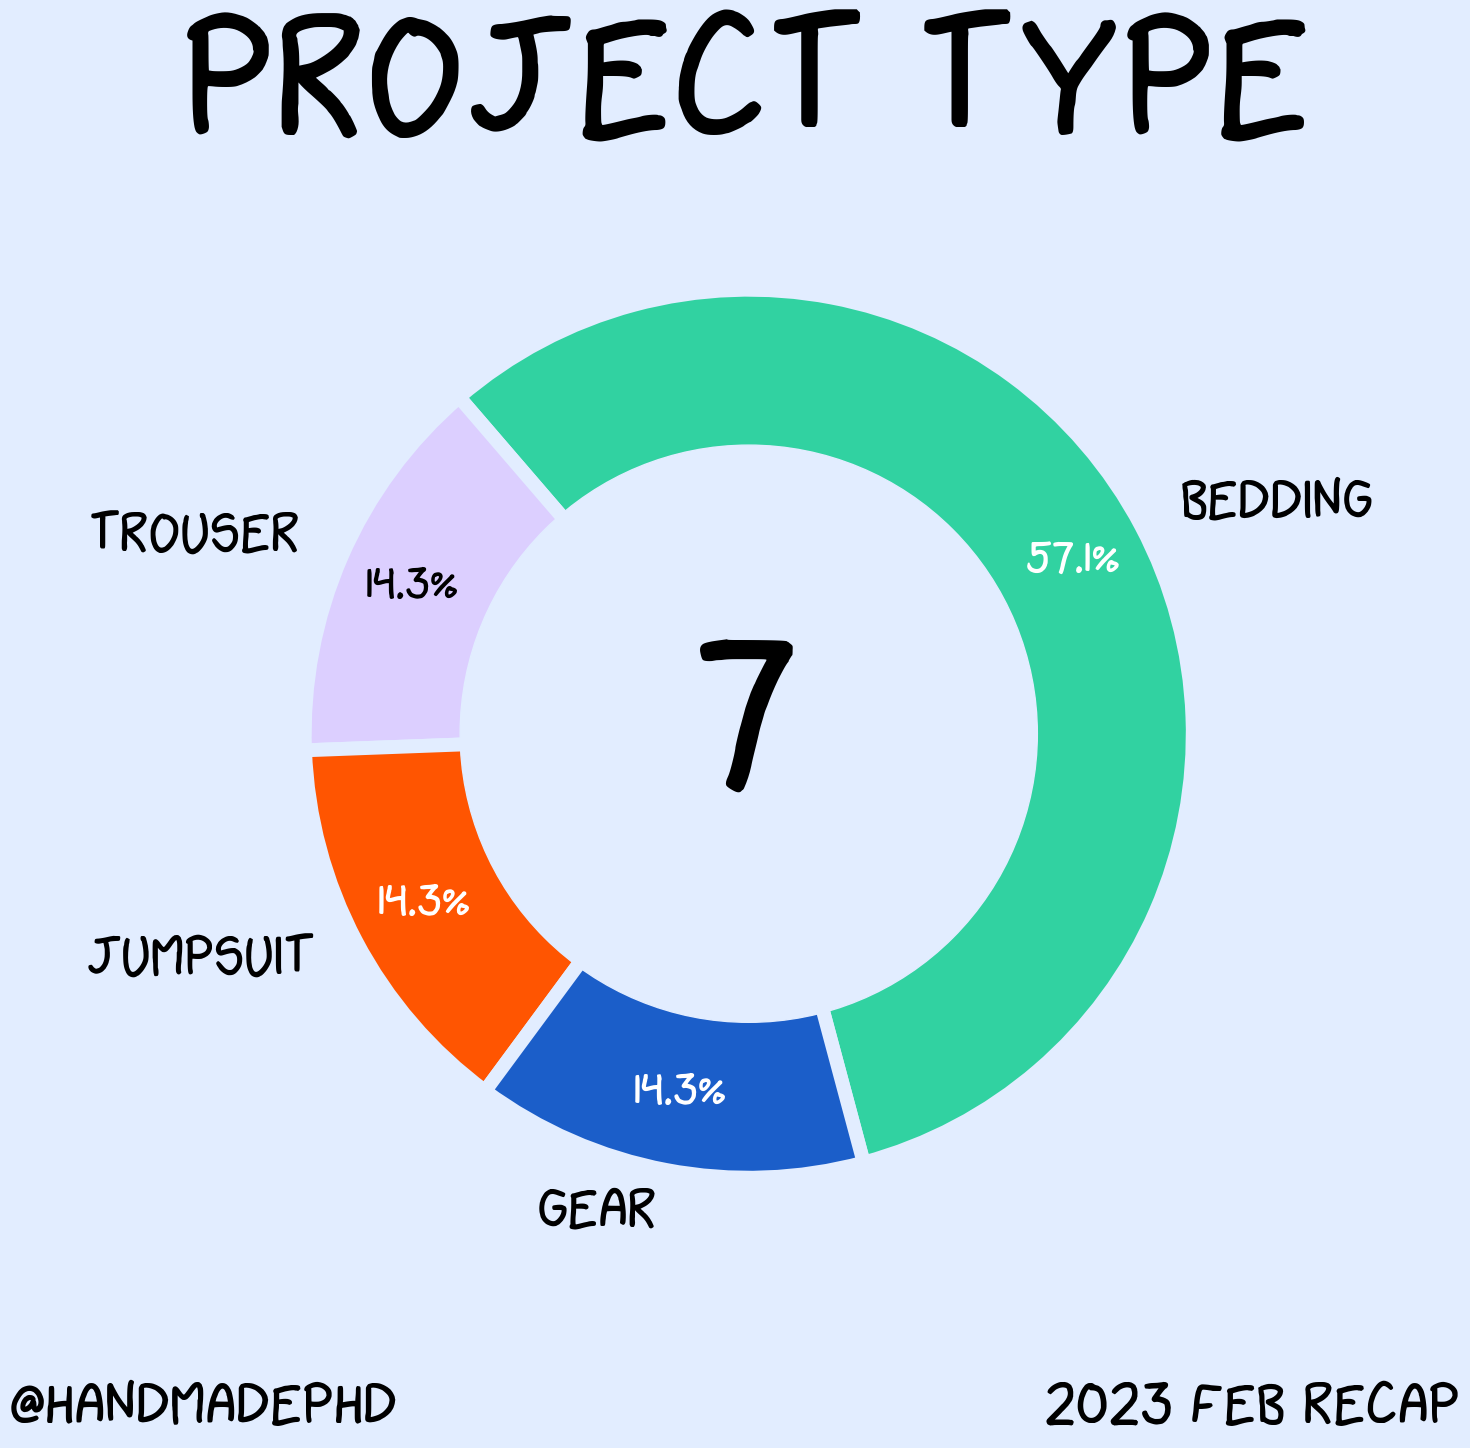

In [12]:
################
# PROJECT TYPE
################
var="PROJECT TYPE"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("PROJECT TYPE", fontsize=125, loc="center")
plt.savefig("project-type.png", dpi=150)
plt.show()

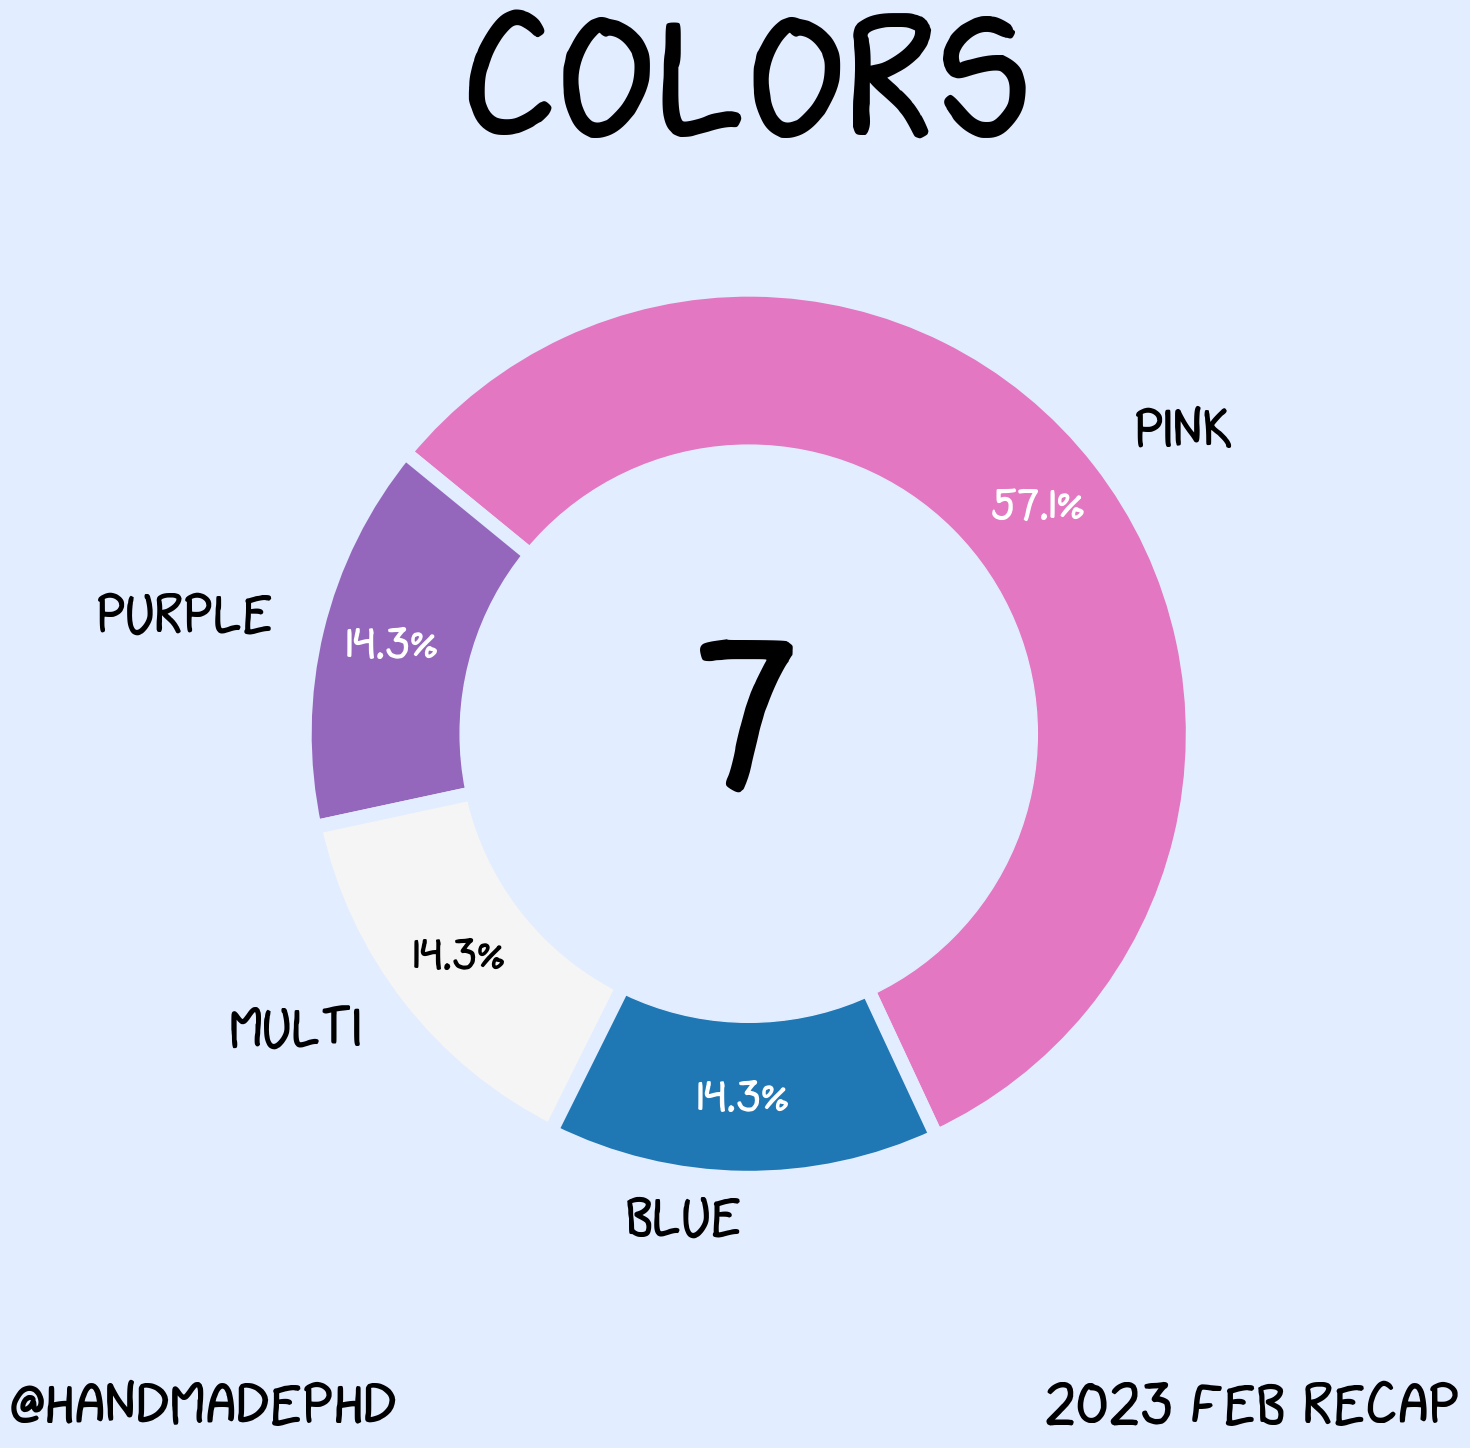

In [13]:
##########
# COLORS
##########
var = "COLOR CATEGORY"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])

# CUSTOM WEDGES
colors=list(tab[var])
for i in range(len(colors)):
    if colors[i] == "WHITE":
        colors[i] = "white"
    elif colors[i] == "BLUE":
        colors[i] = "tab:blue"
    elif colors[i] == "ORANGE":
        colors[i] = "tab:orange"
    elif colors[i] == "GREY":
        colors[i] = "tab:gray"
    elif colors[i] == "GREEN":
        colors[i] = "tab:green"
    elif colors[i] == "BROWN":
        colors[i] = "tab:brown"
    elif colors[i] == "PINK":
        colors[i] = "tab:pink"
    elif colors[i] == "PURPLE":
        colors[i] = "tab:purple"
    elif colors[i] == "MULTI":
        colors[i] = "whitesmoke"

custom_project_piechart()

# SAVE FIGURE
plt.title("COLORS", fontsize=125, loc="center")
plt.savefig("colors.png", dpi=150)
plt.show()

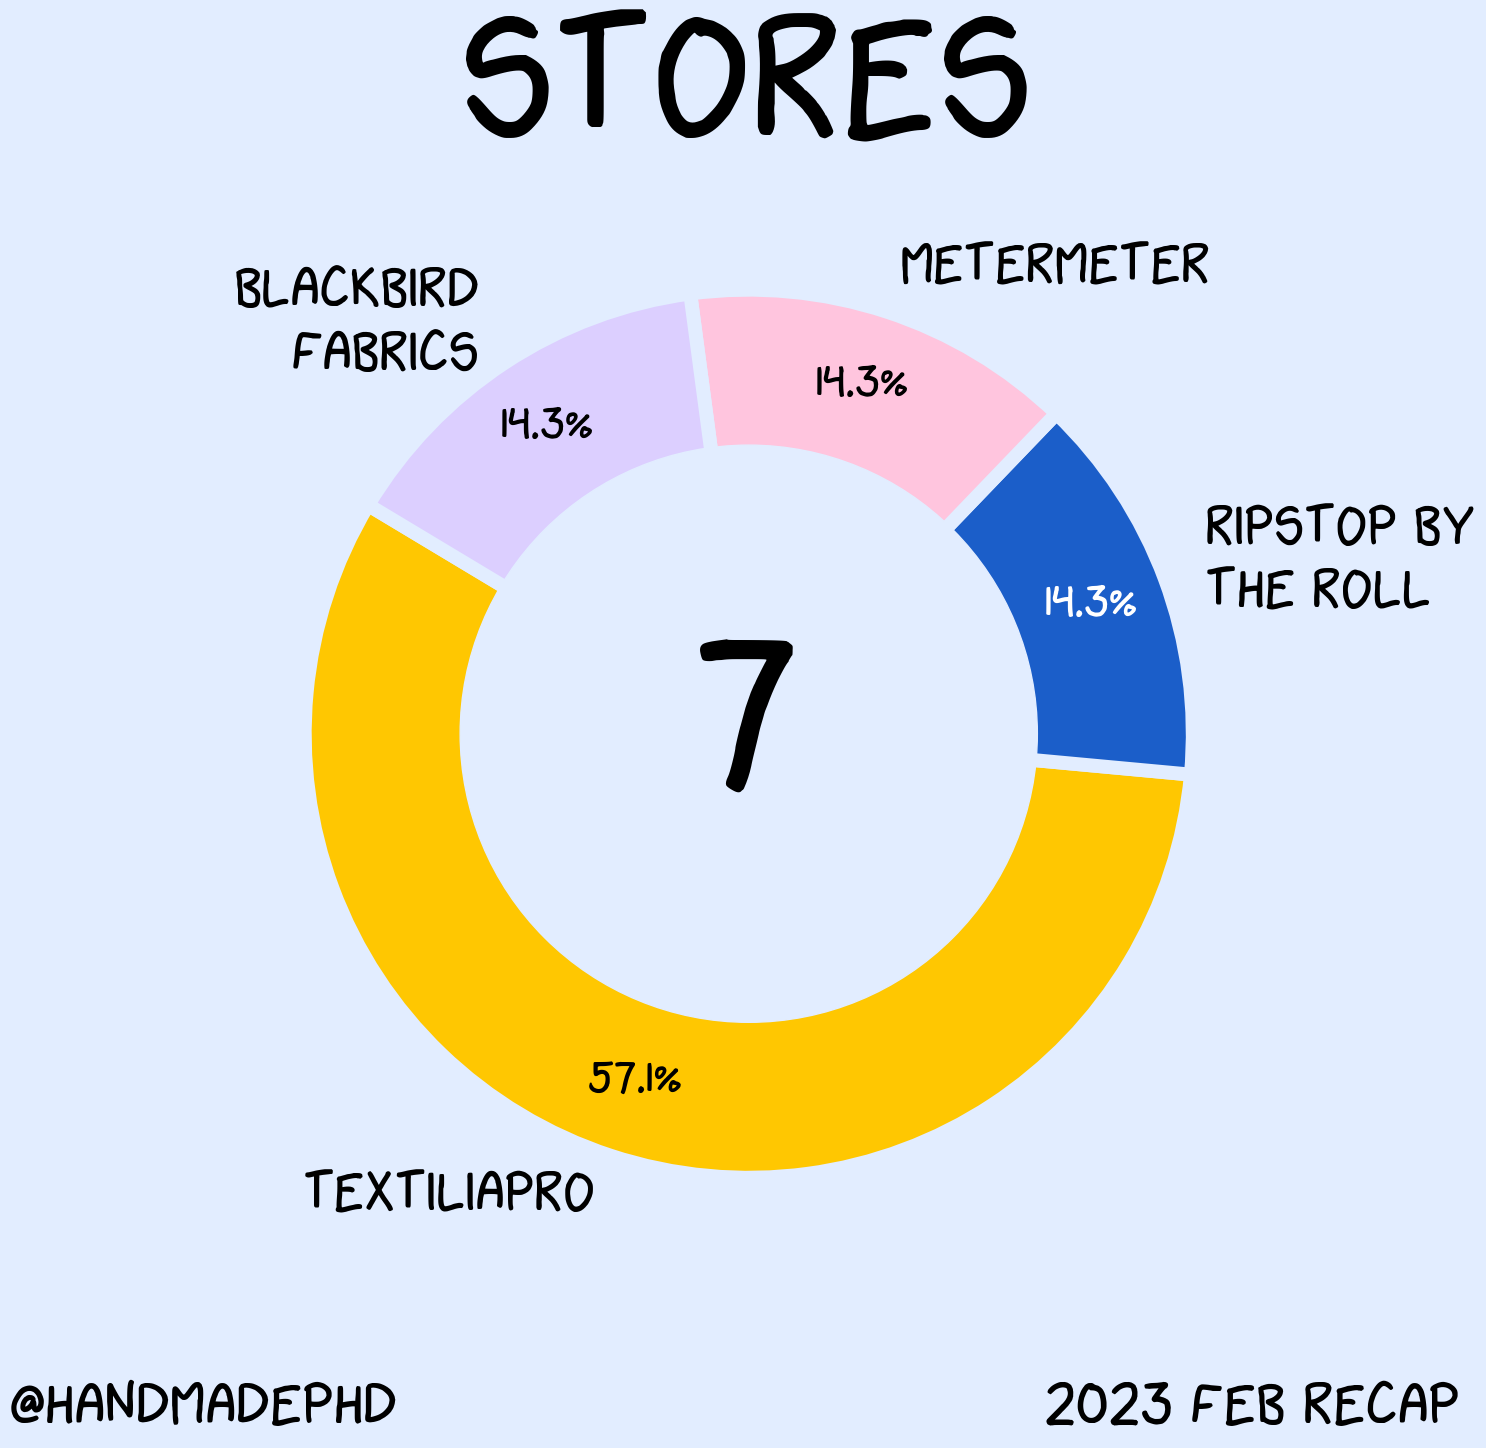

In [14]:
#################
# FABRIC STORES
#################
var="VENDOR"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("STORES", fontsize=125, loc="center")
plt.savefig("fabric-stores.png", dpi=150)
plt.show()

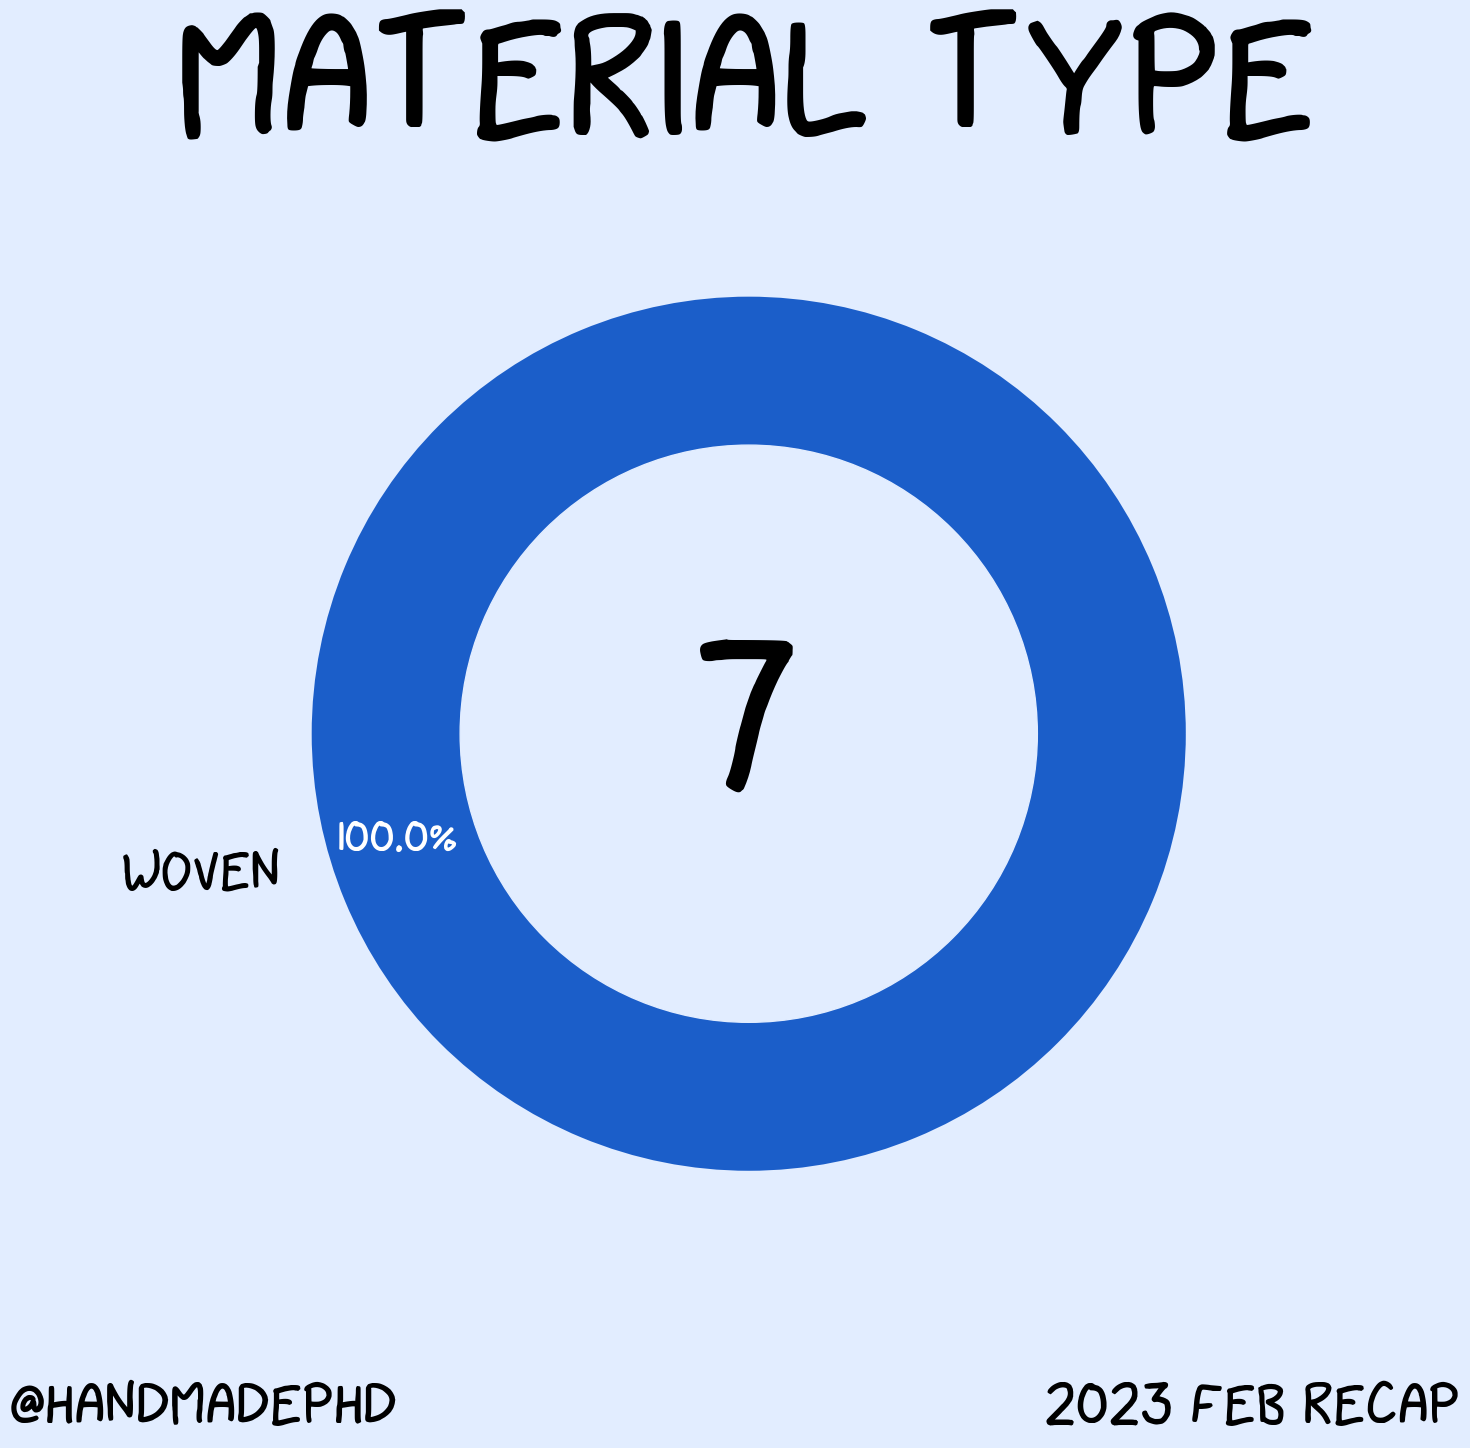

In [15]:
################
# FABRIC TYPES
################
var="FABRIC TYPE"
tab=df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("MATERIAL TYPE", fontsize=125, loc="center")
plt.savefig("fabric-type.png", dpi=150)
plt.show()

In [16]:
########################
# LOAD TIME DATASHEET
########################
df1 = pd.read_excel(r"../2023-recap.xlsx", sheet_name="TIME", usecols="A:C,F", parse_dates=["DATE"])
df2 = df1[df1["DATE"] .dt.strftime("%Y-%m") == YYYYMM]

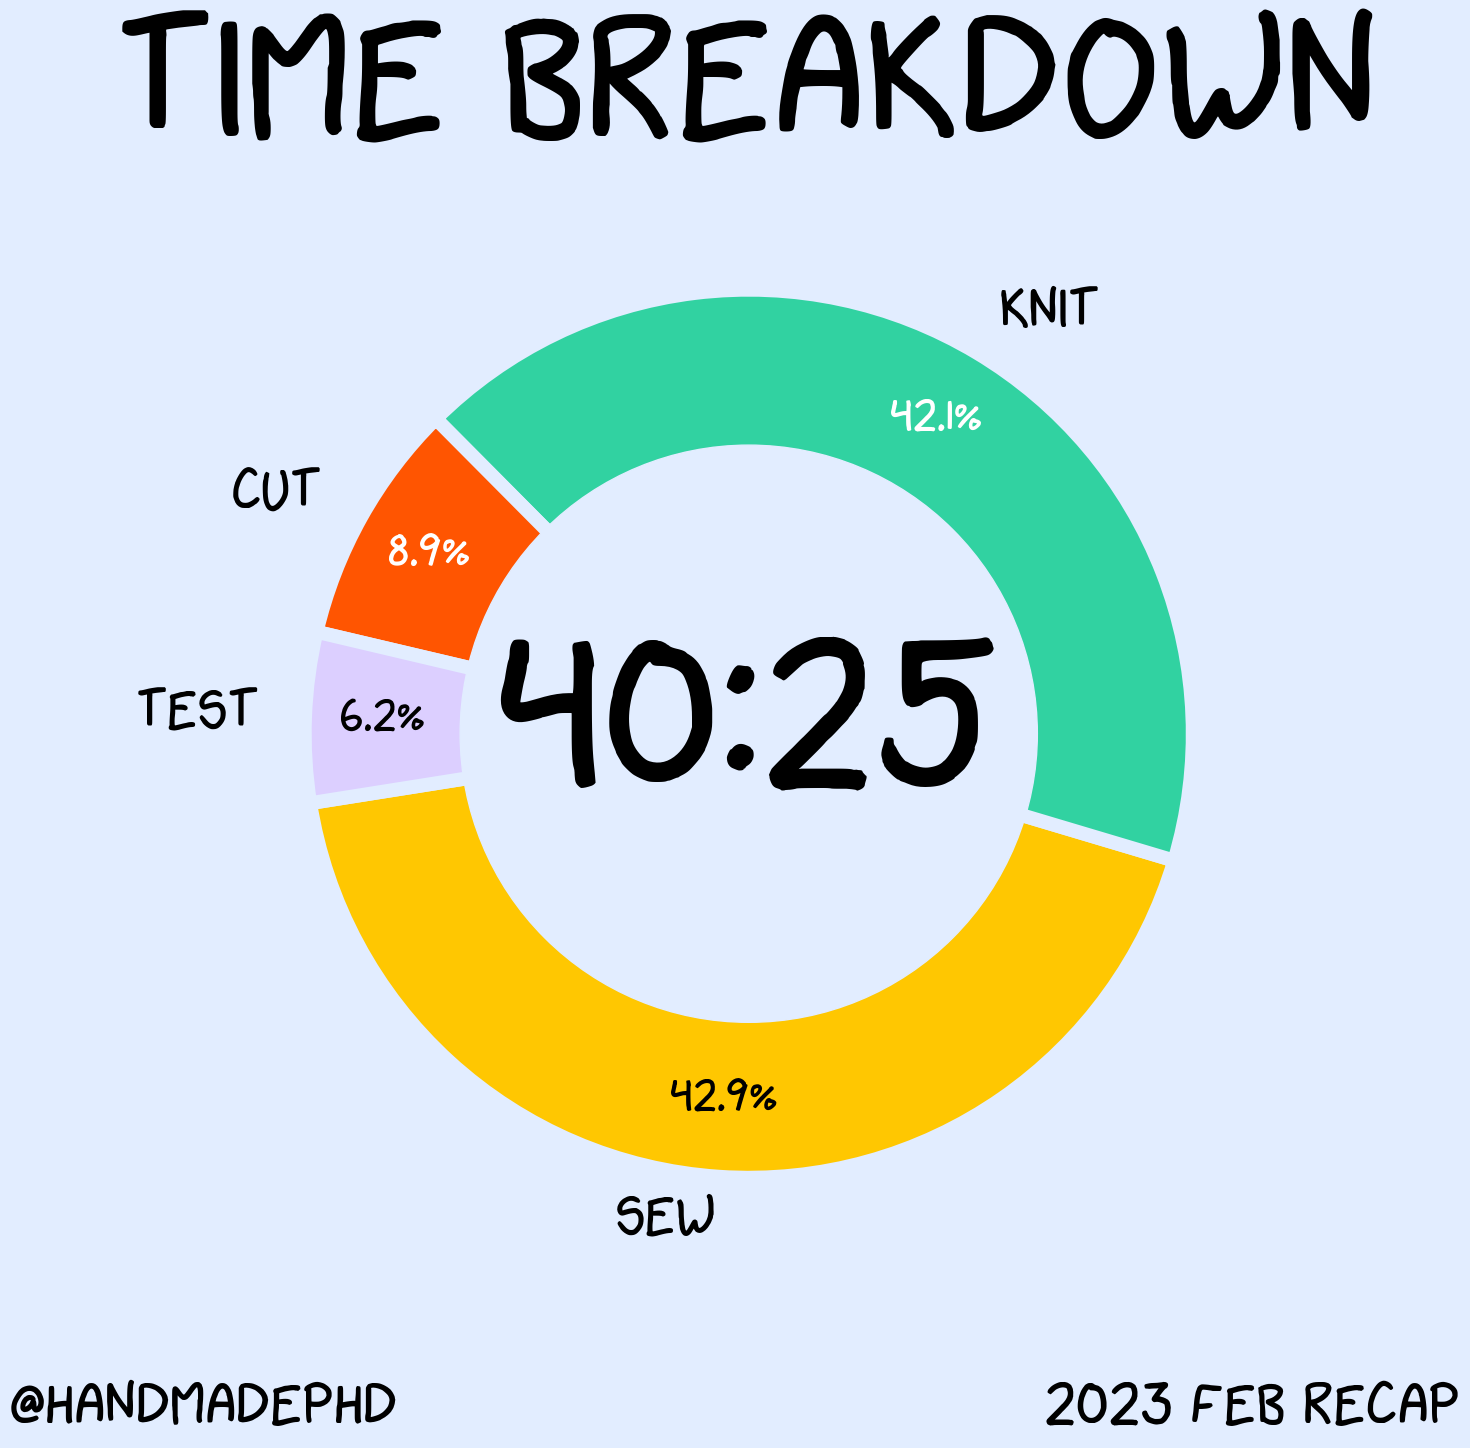

In [17]:
##################
# TIME BREAKDOWN
##################
var = "TASK"
tab = df2.stb.freq([var], value="SECONDS")
tab_total = round(sum(tab["SECONDS"]), 2)
tab_total = (secondsToTime(tab_total))

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("TIME BREAKDOWN", fontsize=125, loc="center")
plt.savefig("time-breakdown.png", dpi=150)
plt.show()

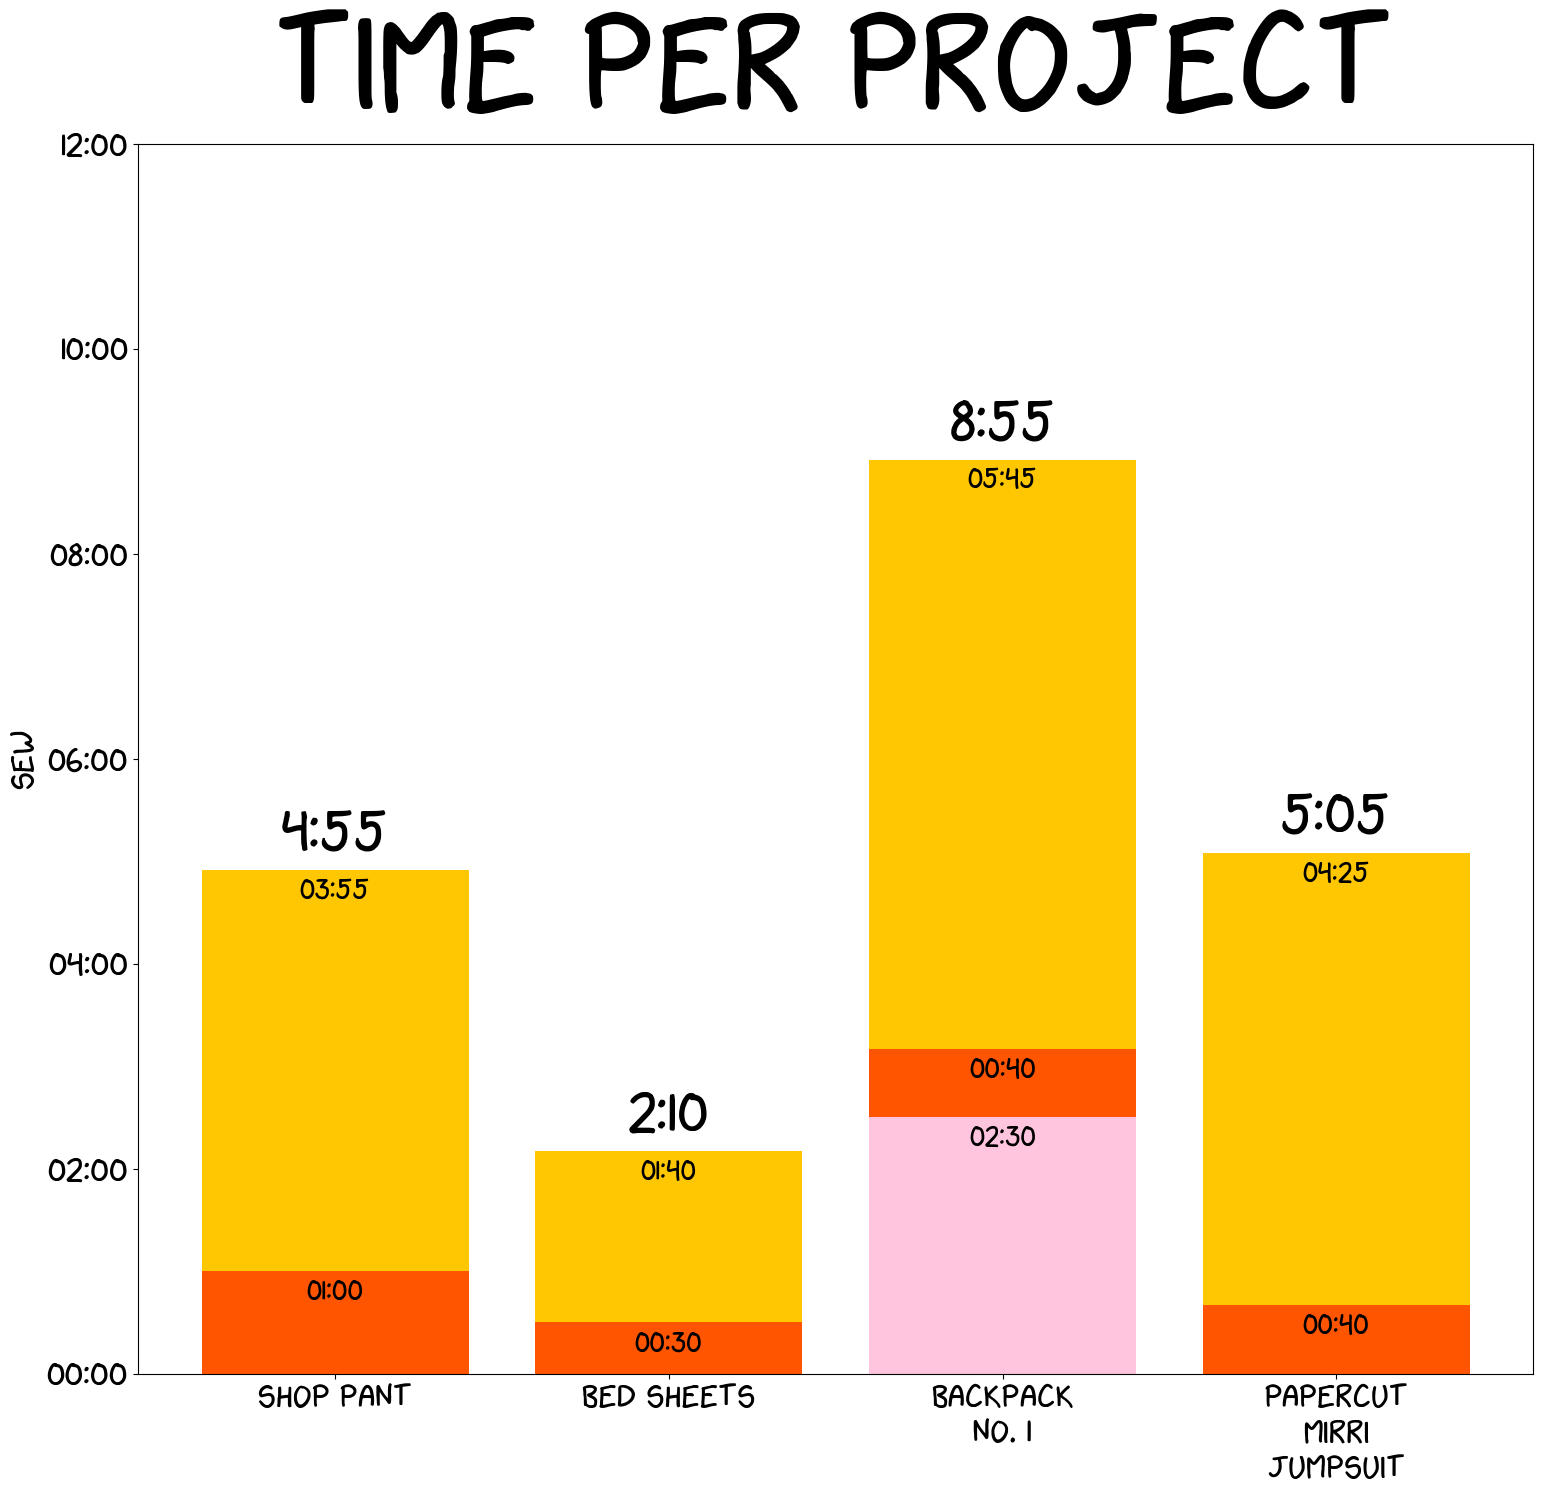

In [18]:
##############################
# TIME PER COMPLETED PROJECT
##############################
tab = df1.stb.freq(["PROJECT NAME", "TASK"], value="SECONDS")
tab = tab.iloc[:, 0:3]
tab = tab.pivot(index="PROJECT NAME", columns=["TASK"])
tab = tab.reset_index()
tab.fillna(0, inplace=True)
tab = pd.DataFrame(tab.to_records(index=False))
tab.columns = [list(tab.columns[0].split("'"))[1],
               list(tab.columns[1].split("'"))[3],
               list(tab.columns[2].split("'"))[3],
               list(tab.columns[3].split("'"))[3],
               list(tab.columns[4].split("'"))[3],
               list(tab.columns[5].split("'"))[3]]

for p in df1["PROJECT NAME"].unique():
    tab.loc[tab["PROJECT NAME"]==p, "DATE"] = df1.loc[df1["PROJECT NAME"]==p, "DATE"].max()

tab.index = tab["DATE"]
tab = tab.sort_index()
tab = pd.DataFrame(tab.to_records(index=False))

for p in df1["PROJECT NAME"].unique():
  strdate = df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max()
  if pd.isna(strdate) == True:
    tab.drop(tab[tab["PROJECT NAME"]==p].index, inplace=True)
  if pd.isna(strdate) == False:
    if (df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max().strftime("%Y-%m") != YYYYMM) == True:
        tab.drop(tab[tab["PROJECT NAME"]==p].index, inplace=True)

tab = tab.reset_index()

# CUSTOM LABELS
custom_label(tab["PROJECT NAME"])

# PLOT SEW
y_offset = -1000
fig, ax1 = plt.subplots(figsize=(18, 15), dpi=100)
bar5 = ax1.bar(tab["PROJECT NAME"], tab["SEW"], color="#FFC701", bottom=tab["CUT"]+tab["TEST"]+tab["PDF"], label ="SEW")
for i, bar in enumerate(bar5.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:18" else word for word in list(pd.to_datetime(tab["SEW"], unit="s").dt.strftime("%H:%M"))][i], ha="center", fontsize=20)

# PLOT CUT
bar4 = ax1.bar(tab["PROJECT NAME"], tab["CUT"], color="#FF5501", bottom=tab["TEST"]+tab["PDF"], label ="CUT")
for i, bar in enumerate(bar4.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:18" else word for word in list(pd.to_datetime(tab["CUT"], unit="s").dt.strftime("%H:%M"))][i], ha="center", fontsize=20)

# PLOT TEST
bar3 = ax1.bar(tab["PROJECT NAME"], tab["TEST"], color="#FFC5DE", bottom=tab["PDF"], label ="TEST")
for i, bar in enumerate(bar3.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:15" else word for word in list(pd.to_datetime(tab["TEST"], unit="s").dt.strftime("%H:%M"))][i], ha="center", fontsize=20)

# PLOT PDF
bar2 = ax1.bar(tab["PROJECT NAME"], tab["PDF"], color="#31D2A1", label ="PDF")
for i, bar in enumerate(bar2.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:18" else word for word in list(pd.to_datetime(tab["PDF"], unit="s").dt.strftime("%H:%M"))][i], ha="center", fontsize=20)

# FORMAT PLOT
plt.xticks(tab["PROJECT NAME"], wrapped_labels, fontsize=24)
ax1.set_yticks([0, 7200, 14400, 21600, 28800, 36000, 43200])
labels = ["00:00", "02:00", "04:00", "06:00", "08:00", "10:00", "12:00"]
ax1.set_yticklabels(labels, fontsize=24)
plt.title("TIME PER PROJECT", fontsize=100)
plt.ylabel("SEW", fontsize=24)
plt.xlabel("", fontsize=24)
plt.subplots_adjust(bottom=0.08)
plt.subplots_adjust(top=0.9)

# ADD TOTAL TIME
for i in range(len(ax1.get_xticklabels())):
  ax1.text(i, tab[["CUT", "PDF", "SEW", "TEST"]].loc[i].sum() + 1200, secondsToTime(tab[["CUT", "PDF", "SEW", "TEST"]].loc[i].sum()), ha="center", va="center")

# PLOT KNIT
# ax2 = ax1.twinx()
# bar1 = ax2.bar(tab["PROJECT NAME"], tab["KNIT"], color="#1B5EC9", label ="KNIT")
# ax2.text(3, tab[["KNIT"]].loc[3].sum() + 3000, secondsToTime(tab[["KNIT"]].loc[3].sum()), ha="center", va="center")
# ax2.set_yticks([0, 3600*5, 3600*10, 3600*15, 3600*20, 3600*25, 3600*30, 3600*35])
# labels = ["00:00", "05:00", "10:00", "15:00", "20:00", "25:00", "30:00", "35:00"]
# ax2.set_yticklabels(labels, fontsize=24, color="#1B5EC9")
# plt.ylabel("KNIT", fontsize=24, color="#1B5EC9")
# plt.figlegend(loc="upper left", bbox_to_anchor=(.125, .9), fontsize=24)

# SAVE FIGURE
plt.savefig("time-project.png", dpi=150)
plt.show()

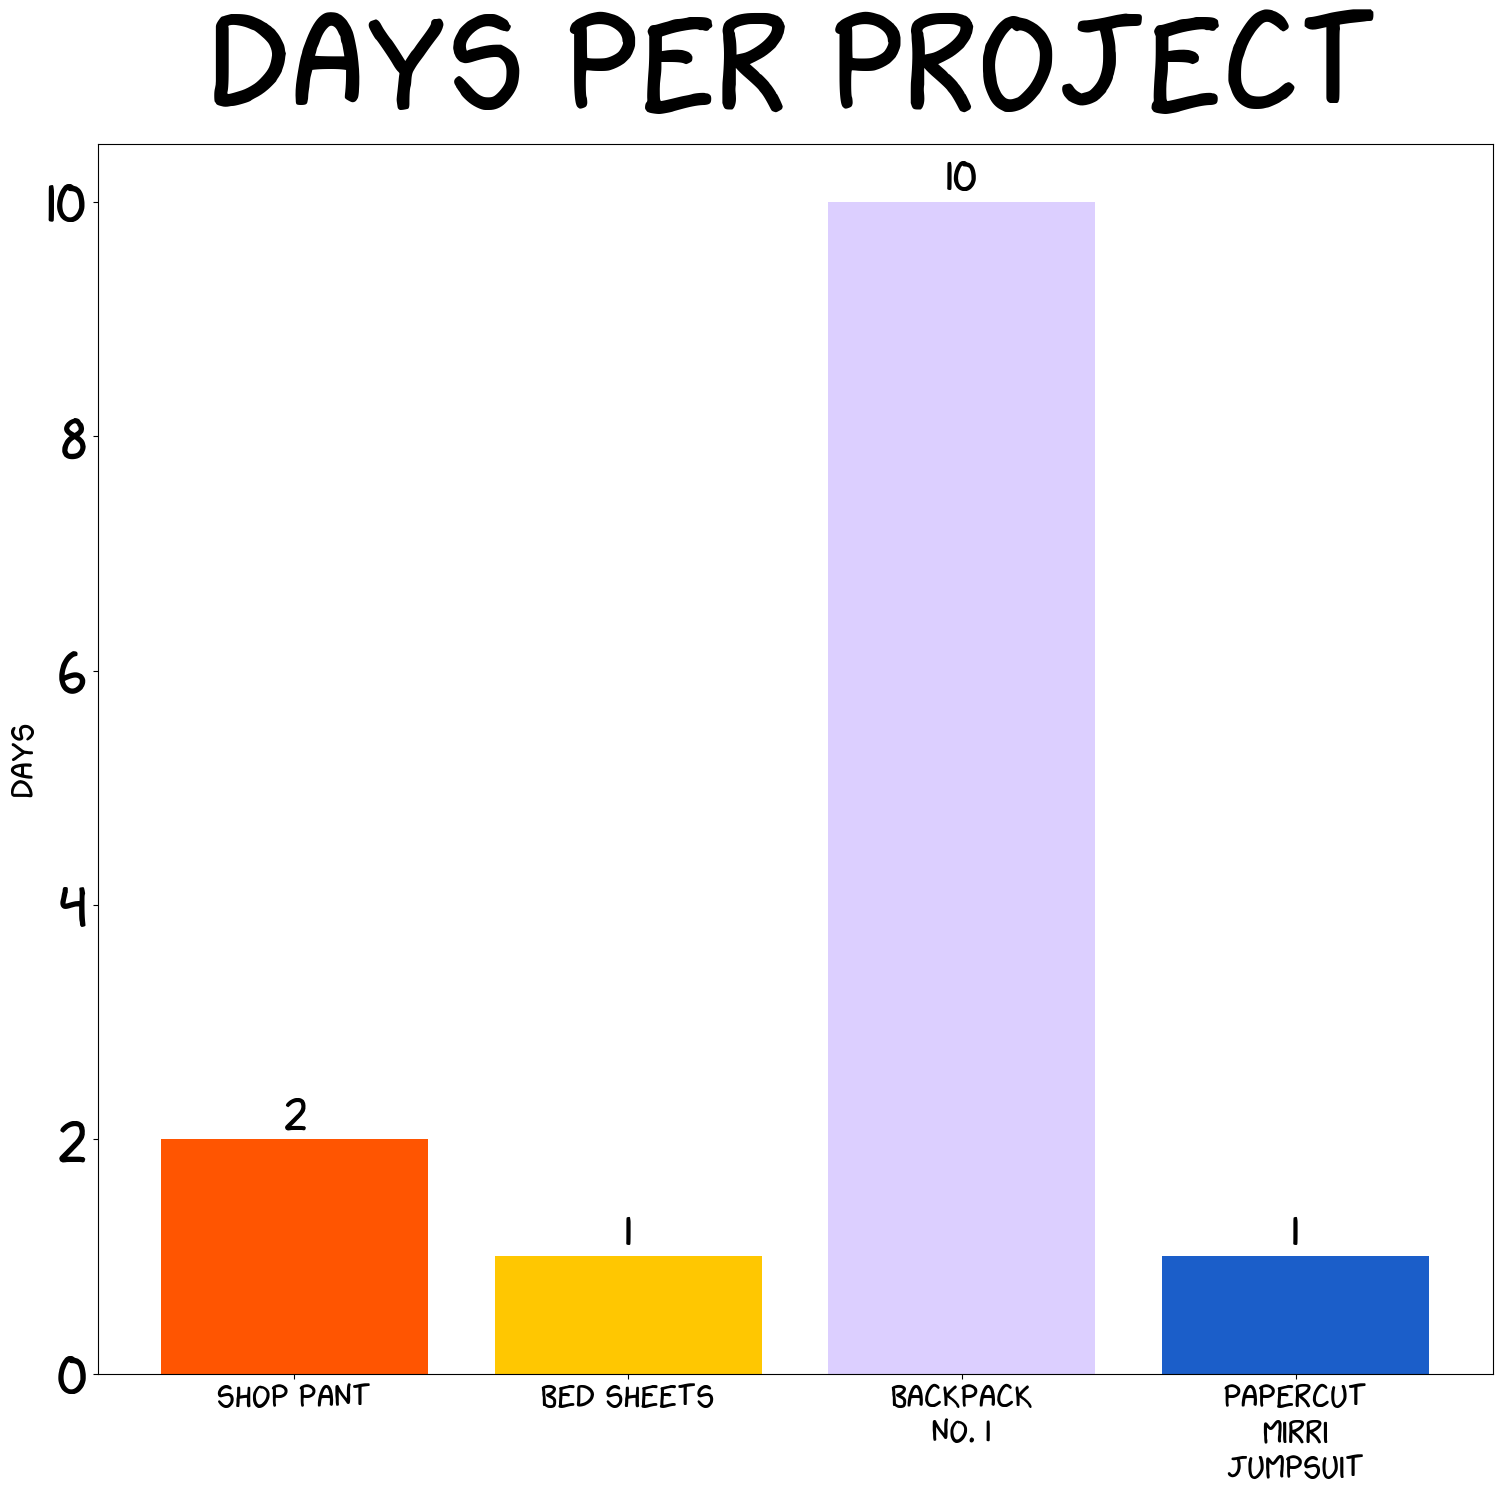

In [19]:
############################
# DAYS TO COMPLETE PROJECT
############################
dfs=pd.DataFrame(columns=list("ABC"))
for p in df1["PROJECT NAME"].unique():
    sta = df1.loc[df1["PROJECT NAME"]==p, "DATE"].min()
    end = df1.loc[df1["PROJECT NAME"]==p, "DATE"].max()
    row_to_append = pd.DataFrame([[p, sta, end]], columns=list("ABC"))
    dfs = pd.concat([dfs,row_to_append])
  
dfs["D"] = (dfs["C"] - dfs["B"]).dt.days
dfs = dfs.reset_index().drop("index", axis=1)
for p in df1["PROJECT NAME"].unique():
  strdate = df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max()
  if pd.isna(strdate) == True:
    dfs.drop(dfs[dfs["A"]==p].index, inplace=True)
  if pd.isna(strdate) == False:
    if (df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max().strftime("%Y-%m") != YYYYMM) == True:
        dfs.drop(dfs[dfs["A"]==p].index, inplace=True)

dfs.columns = ["PROJECT NAME", "START", "END", "DAYS"]
dfs.index = dfs["END"]
dfs = dfs.sort_index()
dfs = pd.DataFrame(dfs.to_records(index=False))

# CUSTOM LABELS
custom_label(tab["PROJECT NAME"])

# CUSTOM WEDGES
custom_wedges()

# PLOT    
fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
ax.bar(dfs["PROJECT NAME"], dfs["DAYS"], color=colors)

# FINAL FORMATTING
plt.xticks(dfs["PROJECT NAME"], wrapped_labels, fontsize=24)
plt.title("DAYS PER PROJECT", fontsize=100)
plt.ylabel("DAYS", fontsize=24)
plt.xlabel("", fontsize=24)
plt.subplots_adjust(bottom=0.08)
plt.subplots_adjust(top=0.9)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=32) 

# SAVE FIGURE
plt.savefig("day-project.png", dpi=150)
plt.show()

In [20]:
########################
# SUMMARY AND AVERAGES
########################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="PROJECTS")
df["MADE FOR"].replace(to_replace=["NAOMI"], value="ME", inplace=True)
df["MADE FOR"].replace(to_replace=["RYAN"], value="NOT ME", inplace=True)
df["ARRIVED"] = df["ARRIVED"].astype("datetime64[ns]")
df["STARTED"] = df["STARTED"].astype("datetime64[ns]")
df["PROJECT COMPLETED"] = df["PROJECT COMPLETED"].astype("datetime64[ns]")

# SEWING SUMMARY AND AVERAGES
sw=df[(df["METHOD"] == "SEW")]
dict = {"YD": {"YD": 1, "M": 1.093613}}
for col, unit in [("AMOUNT ORDERED", "YD"), ("AMOUNT USED", "YD")]:
    sw[col] = sw[col] * sw[f"{col} UNIT"].map(dict[unit])
    sw[f"{col} UNIT"] = unit

a=round(sw[sw["PROJECT COMPLETED"].dt.strftime("%Y-%m") == YYYYMM]["AMOUNT USED"].sum(),1)
b=round(sw[sw["PURCHASED"].dt.strftime("%Y-%m") == YYYYMM]["AMOUNT ORDERED"].sum(),1)
tab=sw[sw["PROJECT COMPLETED"].dt.strftime("%Y-%m") == YYYYMM]
c=tab.groupby(["PROJECT NAME"]).agg({"AMOUNT USED": "sum"}).reset_index()
c=round(c["AMOUNT USED"].mean(),1)
d=tab.groupby(["PROJECT NAME"]).agg({"DAYS IN STASH": "unique"}).reset_index()
d["DAYS IN STASH"] = d["DAYS IN STASH"].str[0]
d=round(d["DAYS IN STASH"].mean(),0)

# KNITTING SUMMARY AND AVERAGES
kt=df[(df["METHOD"] == "KNIT")]
e=round(kt[kt["PROJECT COMPLETED"].dt.strftime("%Y-%m") == YYYYMM]["AMOUNT USED"].sum(),1)
f=round(kt[kt["PURCHASED"].dt.strftime("%Y-%m") == YYYYMM]["AMOUNT ORDERED"].sum(),1)
tab=kt[kt["PROJECT COMPLETED"].dt.strftime("%Y-%m") == YYYYMM]
g = []
h = []
if not tab.empty:
    g=tab.groupby(["PROJECT NAME"]).agg({"AMOUNT USED": "sum"}).reset_index()
    g=round(g["AMOUNT USED"].mean(),1)
    h=tab.groupby(["PROJECT NAME"]).agg({"DAYS IN STASH": "unique"}).reset_index()
    h["DAYS IN STASH"] = h["DAYS IN STASH"].str[0]
    h=round(h["DAYS IN STASH"].mean(),0)

# TIME SUMMARY AND AVERAGES
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="TIME", usecols="A:C,F", parse_dates=["DATE"])
df = df[df["DATE"] .dt.strftime("%Y-%m") == YYYYMM]
j = (secondsToTime(round(df[(df["TASK"] != "KNIT")]["SECONDS"].sum(),1)/days))
k = (secondsToTime(round(df[(df["TASK"] == "KNIT")]["SECONDS"].sum(),1)/days))

In [21]:
print("Yards of fabric cut: ", a)
print("Yards of fabric bought: ", b)
print("Average yards per item: ", c)
print("Average days in stash: ", d)
print("Skeins knitted :", e)
print("Skeins purchased :", f)
print("Average skeins per item: ", g)
print("Average days in stash: ", h)
print("Average sewing per day", j)
print("Average knitting per day", k)

Yards of fabric cut:  21.3
Yards of fabric bought:  20.7
Average yards per item:  3.0
Average days in stash:  11.0
Skeins knitted : 0.0
Skeins purchased : 0.0
Average skeins per item:  []
Average days in stash:  []
Average sewing per day 0:50
Average knitting per day 0:36


In [22]:
#######################
# HELPFUL INFORMATION
#######################
# tab:blue : #1f77b4
# tab:orange : #ff7f0e
# tab:green : #2ca02c
# tab:red : #d62728
# tab:purple : #9467bd
# tab:brown : #8c564b
# tab:pink : #e377c2
# tab:gray : #7f7f7f
# tab:olive : #bcbd22
# tab:cyan : #17becf